<a href="https://colab.research.google.com/github/Dr-Mamiz/Projects-Data-Analysis/blob/main/Data_Analysis_Weather_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Analysis-**Weather Dataset #2**.
 Real project **Big-Data-Analysis**
#          **TASK**
I-Dataset cleaning
Q. 1)  Find all the unique 'Wind Speed' values in the data.
Q. 2) Find the number of times when the 'Weather is exactly Clear'.
Q. 3) Find the number of times when the 'Wind Speed was exactly 4 km/h'.
Q. 4) Find out all the Null Values in the data.
Q. 5) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.
Q. 6) What is the mean 'Visibility' ?
Q. 7) What is the Standard Deviation of 'Pressure'  in this data?
Q. 8) What is the Variance of 'Relative Humidity' in this data ?
Q. 9) Find all instances when 'Snow' was recorded.
Q. 10) Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.
Q. 11) What is the Mean value of each column against each 'Weather Condition ?
Q. 12) What is the Minimum & Maximum value of each column against each 'Weather Condition ?
Q. 13) Show all the Records where Weather Condition is Fog.
Q. 14) Find all instances when 'Weather is Clear' or 'Visibility is above 40'.
Q. 15) Find all instances when :
A. 'Weather is Clear' and 'Relative Humidity is greater than 50'
or
B. 'Visibility is above 40'
.......II Visualisation


In [1]:
# Importe packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data_weather= pd.read_csv('/content/1. Weather Data.csv')

In [3]:
# Copy of our dataset
df=data_weather.copy()

In [4]:
#Analysing our dataset
df.head(5)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [39]:
# Dataset SHAPE
df.shape
print (f'The shape of our dataset is {df.shape}')

The shape of our dataset is (8784, 9)


In [6]:
# Data dtypes
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [8]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date/Time          8784 non-null   object 
 1   Temp_C             8784 non-null   float64
 2   Dew Point Temp_C   8784 non-null   float64
 3   Rel Hum_%          8784 non-null   int64  
 4   Wind Speed_km/h    8784 non-null   int64  
 5   Visibility_km      8784 non-null   float64
 6   Press_kPa          8784 non-null   float64
 7   Weather Condition  8784 non-null   object 
 8   grouped            8784 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 617.8+ KB


In [48]:
# 1) Find all the unique 'Wind Speed' values in the data.

df['Wind Speed_km/h'].unique()



array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [51]:
df['Wind Speed_km/h'].nunique()

print (f'The number of unique Wind Speed values in the data { 34 }')


The number of unique Wind Speed values in the data 34


In [12]:
# 2) Find the number of times when the 'Weather is exactly Clear'
df[df['Weather'].isin(['Clear'])].count()

Date/Time           1326
Temp_C              1326
Dew Point Temp_C    1326
Rel Hum_%           1326
Wind Speed_km/h     1326
Visibility_km       1326
Press_kPa           1326
Weather             1326
dtype: int64

In [52]:
print (f'the number of times when the Weather is exactly Clear is { 1326 }')


the number of times when the Weather is exactly Clear is 1326


In [13]:
# We can also by filtring
df[df.Weather=='Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [14]:
# 3) Find the number of times when the 'Wind Speed was exactly 4 km/h'
df[df['Wind Speed_km/h']==4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [15]:
# Also we can check the number of times when the 'Wind Speed was exactly 4 km/h'
df[df['Wind Speed_km/h'].isin(['4'])].count()

Date/Time           474
Temp_C              474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

In [54]:
print (f'The number of times when the Wind Speed was exactly 4 km/h is { 474 }')


The number of times when the Wind Speed was exactly 4 km/h is 474


In [65]:
#  4) Find out all the Null Values in the data
df.isnull().sum()

print (f'All the Null Values in the data are:{ df.isnull().sum()}')


All the Null Values in the data are:Date/Time            0
Temp_C               0
Dew Point Temp_C     0
Rel Hum_%            0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather Condition    0
grouped              0
dtype: int64


In [17]:
# 5) Rename the column name 'Weather' of the dataframe to 'Weather Condition'.

df.rename(columns = {'Weather':'Weather Condition'},inplace=True)


In [18]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


In [67]:
# 6) What is the mean 'Visibility' ?
df.Visibility_km.mean()

print (f'The mean for the visibility is :{ df.Visibility_km.mean()}')


The mean for the visibility is :27.66444672131151


In [20]:
# 7) What is the Standard Deviation of 'Pressure' in this data?

df['Press_kPa'].std()

0.8440047459486474

 We've a very high standard deviation which indicates data are more spread out of the mean.

In [21]:
# 8) What is the Variance of 'Relative Humidity' in this data ?
df['Rel Hum_%'].var()

286.2485501984998

We've a large variance indicates that numbers in the set are far from the mean and far from each other.

In [22]:
# 9.1) Find all instances when 'Snow' was recorded (ALL SITUATIONS OF SNOW)

df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [23]:
# 9.2) Find all instances when 'Snow' was recorded (JUST SNOW)
df[df['Weather Condition']=='Snow']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,9.7,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [24]:
# 10) Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'.

df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,12/28/2012 17:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,12/30/2012 17:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,12/30/2012 19:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [25]:
# 11) What is the Mean value of each column against each 'Weather Condition ? 

df.groupby('Weather Condition').mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [26]:
# 12) What is the Minimum & Maximum value of each column against each 'Weather Condition ?
# 12.1) MAX

df.groupby('Weather Condition').max().head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56


In [27]:
# 12.1) MIN

df.groupby('Weather Condition').min().head(3)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84


In [28]:
# 13) Show all the Records where Weather Condition is Fog
df.head(2)

df[df['Weather Condition']=='Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,12/29/2012 4:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,12/29/2012 5:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,12/29/2012 6:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,12/29/2012 7:00,-14.8,-16.4,88,7,8.0,101.22,Fog


Table showing all the Records where Weather Condition is Fog

In [29]:
# 13.1) ALSO we canShow all the Records where Weather Condition is Fog using this methode
df[df['Weather Condition'].isin(['Fog'])].head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


Table showing all the Records where Weather Condition is Fog .

In [68]:
# 14) Find all instances when 'Weather is Clear' or 'Visibility is above 40'

df[(df['Weather Condition'] =='Clear') | (df['Visibility_km'] > 40)].head(5)
                                                                    

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,grouped
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear,"1/3/2012 19:00,1/5/2012 18:00,1/5/2012 19:00,1..."
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear,"1/2/2012 12:00,1/3/2012 12:00,1/3/2012 13:00,1..."
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear,"1/2/2012 12:00,1/3/2012 12:00,1/3/2012 13:00,1..."
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear,"1/2/2012 12:00,1/3/2012 12:00,1/3/2012 13:00,1..."
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear,"1/2/2012 12:00,1/3/2012 12:00,1/3/2012 13:00,1..."


Above is a table where we can find all instances when 'Weather is Clear' or 'Visibility is above 40'


In [31]:
# 15) Find all instances when : 
# A. 'Weather is Clear' and 'Relative Humidity is greater than 50' or 
# B. 'Visibility is above 40'

df[(df['Weather Condition'] =='Clear') & (df['Rel Hum_%'] > 50) | (df['Visibility_km'] > 40)].head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear


Above is a table where we can find all instances Find all instances when : 
 A. 'Weather is Clear' and 'Relative Humidity is greater than 50' or 
 B. 'Visibility is above 40'

In [72]:
#II Visualisation
df['grouped']=df.groupby('Weather Condition')['Date/Time'].transform(lambda x:','.join(x))



I creat a new column grouped, to group all kind of the weather condition by dates.

In [33]:
df['Temp_C'].nunique()

533

In [34]:
df.groupby('Weather Condition').size()

Weather Condition
Clear                                      1326
Cloudy                                     1728
Drizzle                                      41
Drizzle,Fog                                  80
Drizzle,Ice Pellets,Fog                       1
Drizzle,Snow                                  2
Drizzle,Snow,Fog                             15
Fog                                         150
Freezing Drizzle                              7
Freezing Drizzle,Fog                          6
Freezing Drizzle,Haze                         3
Freezing Drizzle,Snow                        11
Freezing Fog                                  4
Freezing Rain                                14
Freezing Rain,Fog                             4
Freezing Rain,Haze                            2
Freezing Rain,Ice Pellets,Fog                 1
Freezing Rain,Snow Grains                     1
Haze                                         16
Mainly Clear                               2106
Moderate Rain,Fog     

In [35]:
# Deleet duplicated elements Weather Condition
df.drop_duplicates(subset=['Weather Condition'])

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition,grouped
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,"1/1/2012 0:00,1/1/2012 1:00,1/1/2012 4:00,1/1/..."
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog","1/1/2012 2:00,1/1/2012 3:00,1/7/2012 8:00,1/27..."
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,"1/1/2012 16:00,1/2/2012 2:00,1/2/2012 3:00,1/2..."
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,"1/1/2012 17:00,1/1/2012 20:00,1/1/2012 21:00,1..."
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain,"1/1/2012 18:00,1/1/2012 19:00,1/23/2012 14:00,..."
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers,"1/1/2012 22:00,1/2/2012 0:00,2/22/2012 15:00,2..."
36,1/2/2012 12:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear,"1/2/2012 12:00,1/3/2012 12:00,1/3/2012 13:00,1..."
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,"1/2/2012 17:00,1/2/2012 20:00,1/2/2012 21:00,1..."
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow,"1/3/2012 7:00,1/4/2012 12:00,1/4/2012 14:00,1/..."
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear,"1/3/2012 19:00,1/5/2012 18:00,1/5/2012 19:00,1..."


In [36]:
# All weather condition
df.groupby('Weather Condition').size()

Weather Condition
Clear                                      1326
Cloudy                                     1728
Drizzle                                      41
Drizzle,Fog                                  80
Drizzle,Ice Pellets,Fog                       1
Drizzle,Snow                                  2
Drizzle,Snow,Fog                             15
Fog                                         150
Freezing Drizzle                              7
Freezing Drizzle,Fog                          6
Freezing Drizzle,Haze                         3
Freezing Drizzle,Snow                        11
Freezing Fog                                  4
Freezing Rain                                14
Freezing Rain,Fog                             4
Freezing Rain,Haze                            2
Freezing Rain,Ice Pellets,Fog                 1
Freezing Rain,Snow Grains                     1
Haze                                         16
Mainly Clear                               2106
Moderate Rain,Fog     

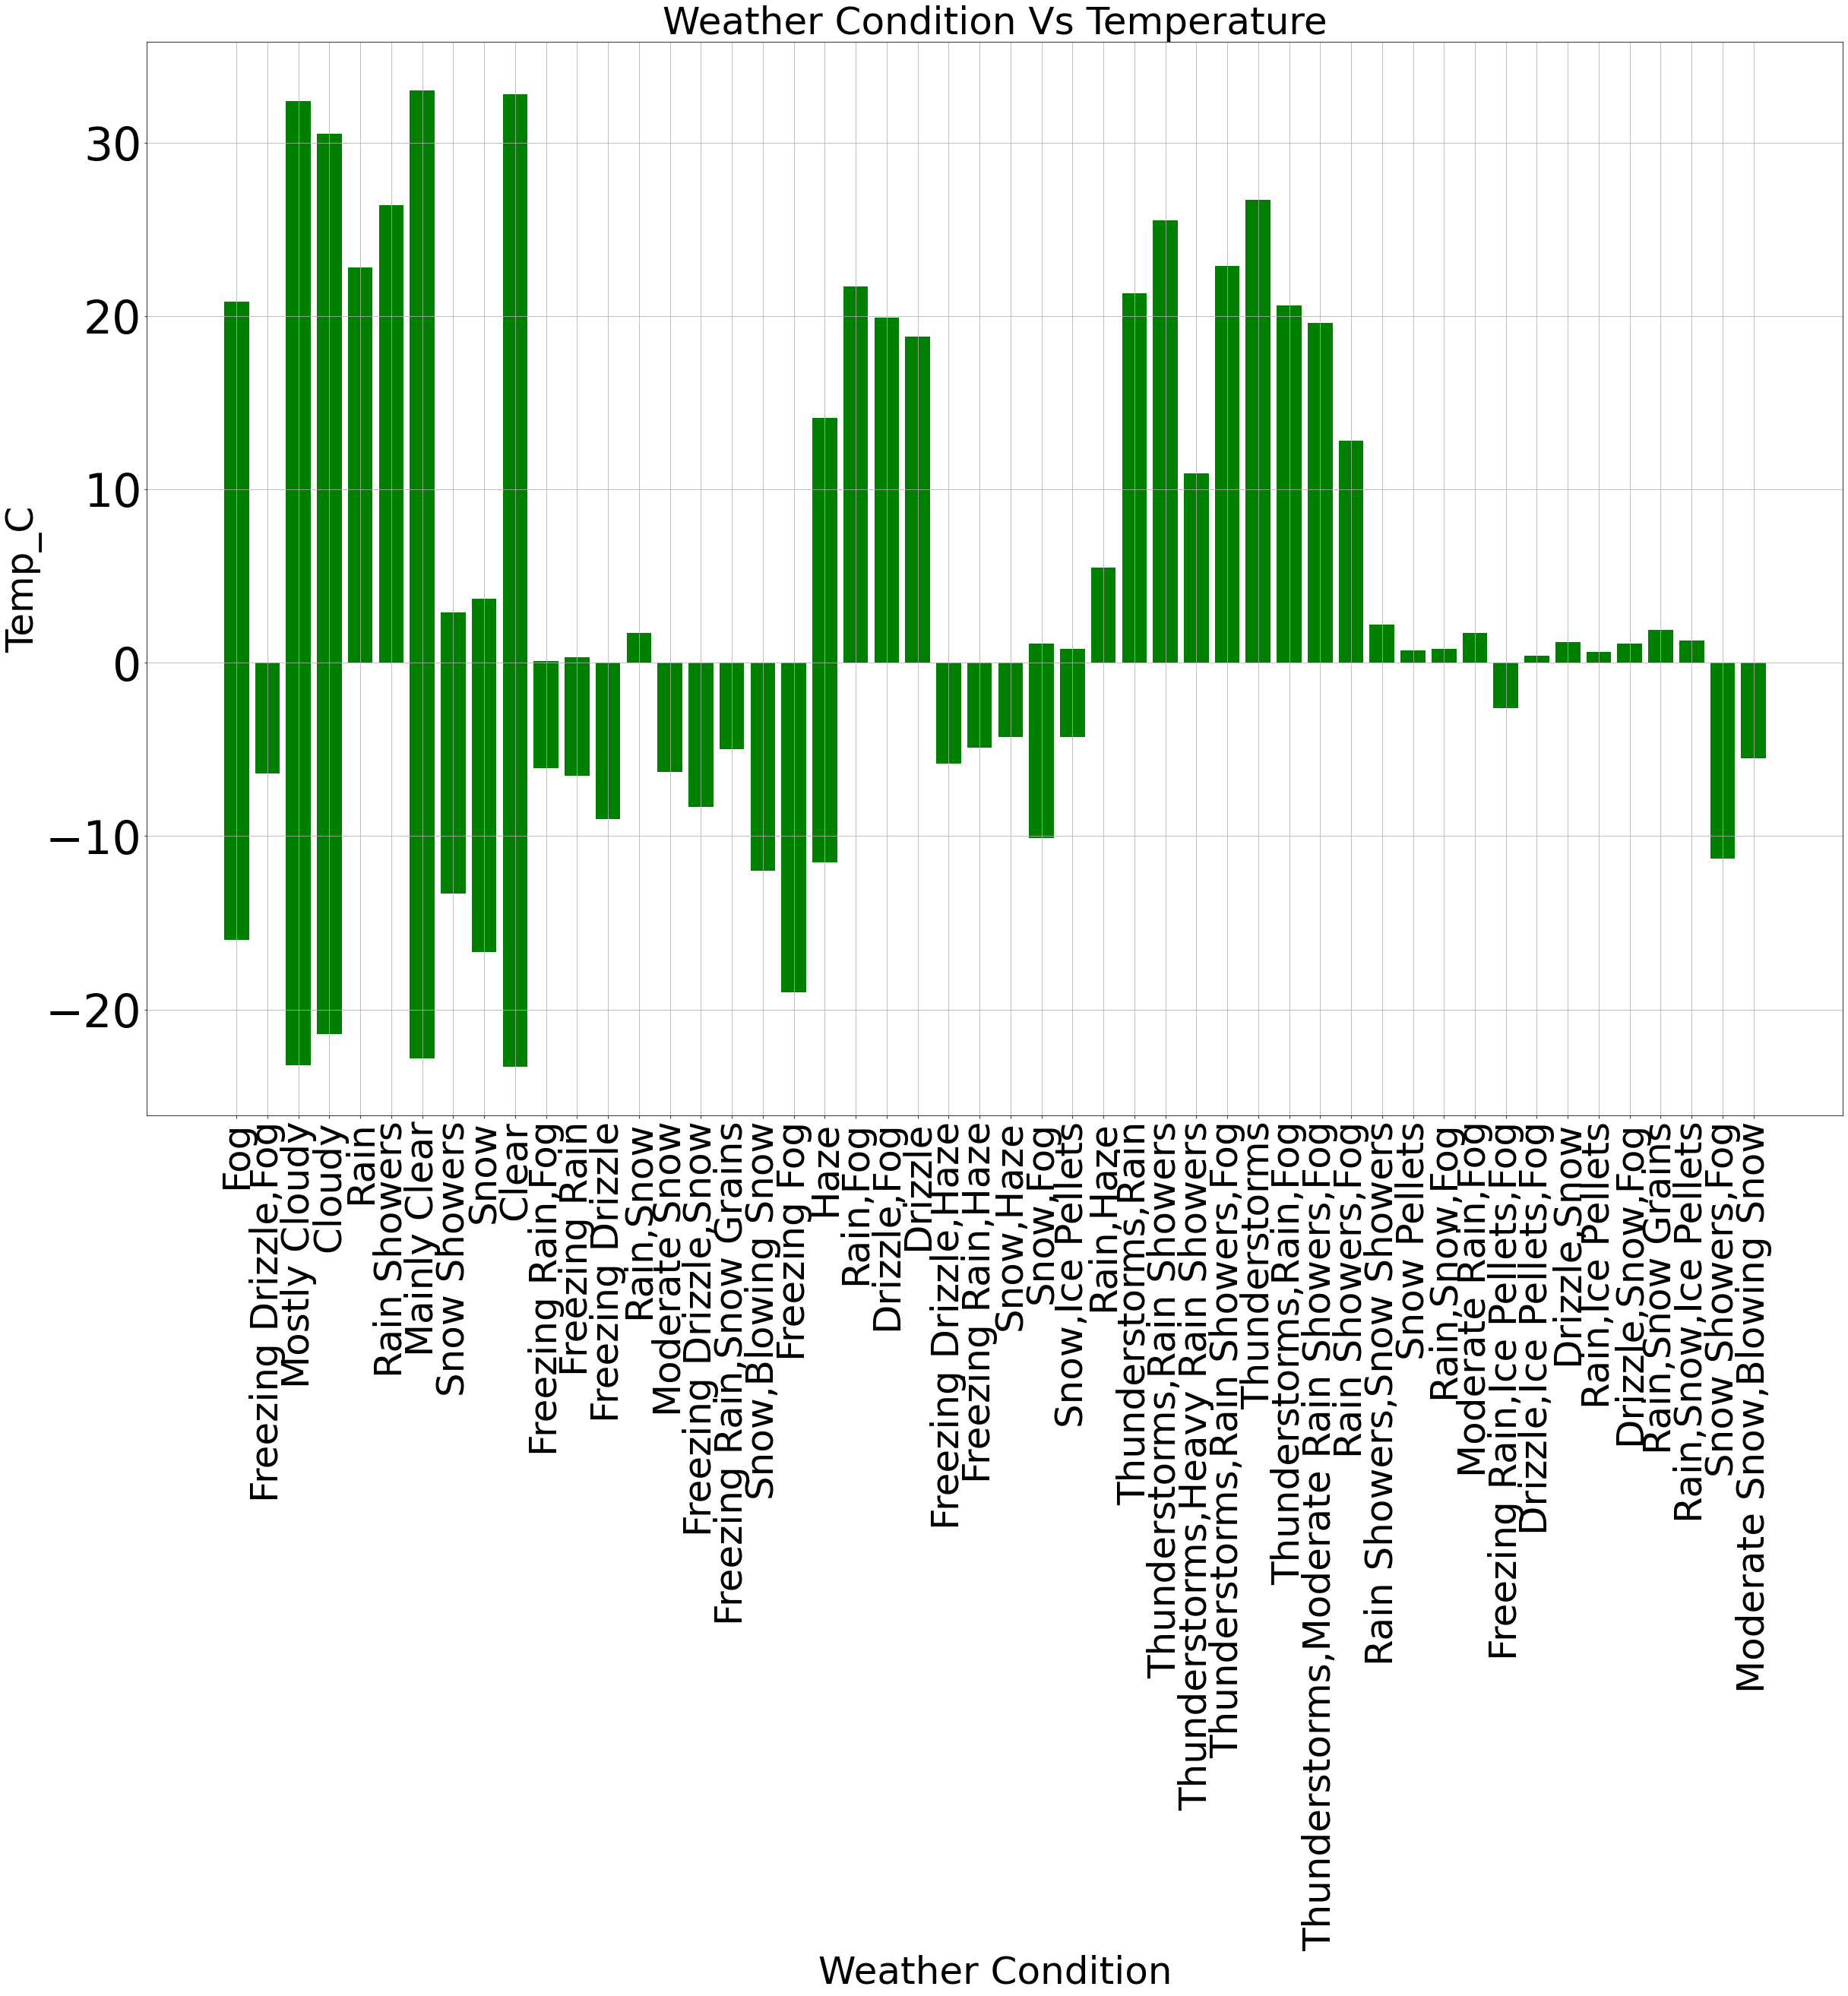

In [38]:
# Visualisation(BAR GRAPHES) Weather Condition Vs Temperature
plt.bar(df['Weather Condition'], df['Temp_C'], color='g')
plt.title('Weather Condition Vs Temperature', fontsize=50)
plt.rcParams['figure.figsize']=(40,26)
plt.xlabel('Weather Condition', fontsize=50)
plt.ylabel('Temp_C', fontsize=50)
plt.xticks(size = 50)
plt.yticks(size = 60)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [71]:
##Finding Pearson's Correlation Coefficient between relative humidity & kpa pressure

df['Rel Hum_%'].corr(df['Press_kPa'])


-0.23142424642119033

A very weak  correlation between relative humidity & kpa pressure

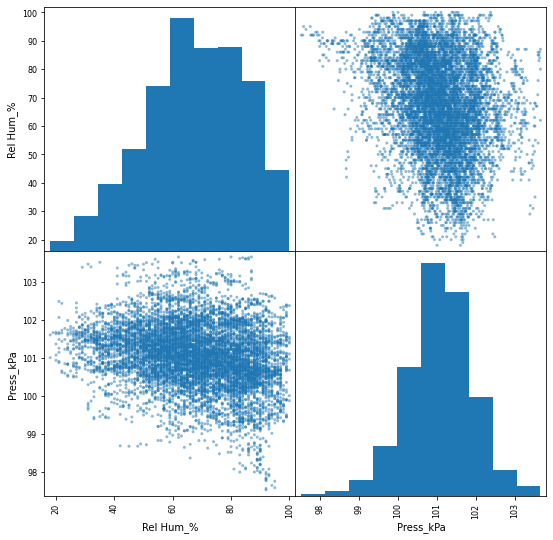

In [70]:
# Let's look at the distributions of humidity & kpa pressure and their dependencies.

pd.plotting.scatter_matrix(df[['Rel Hum_%', 'Press_kPa']], figsize=(9,9));


The distributions are close to normal. The correlation is weak.

In the case relative humidity & kpa pressure, we got a weak correlation between.Therefore, it does not seem appropriate group bouth pressure and humidity.